# ESAA 국민청원 데이터 분석 미니 프로젝트
- 과제 : 지금까지 배운 pandas 코드를 통해 유의미한 결과 5개 이상 출력하고, 그래프 그리기. 
  조건 : 데이터 2개 이상을 연결해본 결과값 포함

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

## 1)데이터 불러오기

In [23]:
df = pd.read_csv('C:\Temp\petition.csv', parse_dates=['start', 'end'])

In [24]:
df.head(5)

,article_id,start,end,answered,votes,category,title,content
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
4,25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


In [25]:
df.tail(5)

,article_id,start,end,answered,votes,category,title,content
395542,517117,2019-02-04,2019-03-06,0,3,보건복지,명절연휴 고속도로 무료반대,명절고속도로 무료보단 대다수의 서민들이 이용하는 대중교통 무료와 명절기간 증차로 했...
395543,517119,2019-02-04,2019-03-06,0,23,보건복지,광주사태 가짜 유공자들 정수기로 걸려내야함,광주사태 유공자들 차고 넘치는데 이래 많은 유공자들 그냥놓아두면 재앙이다.\n김대중...
395544,517120,2019-02-04,2019-03-06,0,0,안전/환경,환경문제,명절이면 후로 제일문제는 쓰레기 문제 입니다.\n제일문제는 선물세트와 농산물세트 입...
395545,517121,2019-02-04,2019-03-06,0,20,정치개혁,"청화대,더불어민주당, 당장 답하라,,,,,,","좌파 더불어민주당, 좌파 정권 청화대는 선한 국민들을 더는 기망하지 말고 담장 답하..."
395546,517122,2019-02-04,2019-03-06,0,16,인권/성평등,여성부 폐지,국민들이 원합니다\n폐지 좀 시키세요;


## 2) 데이터 확인하기

In [28]:
#결측치 확인
df.isnull().sum()

article_id    0
start         0
end           0
answered      0
votes         0
category      0
title         0
content       1
dtype: int64

In [29]:
#데이터 요약
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395547 entries, 0 to 395546
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   article_id  395547 non-null  int64         
 1   start       395547 non-null  datetime64[ns]
 2   end         395547 non-null  datetime64[ns]
 3   answered    395547 non-null  int64         
 4   votes       395547 non-null  int64         
 5   category    395547 non-null  object        
 6   title       395547 non-null  object        
 7   content     395546 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 24.1+ MB


In [30]:
#연속형 자료의 요약
df.describe()

,article_id,answered,votes
count,395547.000000,395547.000000,3.955470e+05
mean,251608.934635,0.000073,1.501188e+02
std,153219.216242,0.008562,4.802583e+03
min,21.000000,0.000000,0.000000e+00
25%,115236.500000,0.000000,2.000000e+00
50%,253682.000000,0.000000,5.000000e+00
75%,386137.500000,0.000000,1.500000e+01
max,517122.000000,1.000000,1.192049e+06


In [31]:
#범주형 자료의 요약
df.describe(include=np.object)

,category,title,content
count,395547,395547,395546
unique,17,346524,375224
top,정치개혁,이명박 출국금지,이명박 출국금지
freq,62750,3018,597


## 3) EDA

### 3-1) 각 부문 별 청원의 수

In [94]:
#각 카테고리 별 청원의 수
catg_counts=pd.DataFrame(df['category'].value_counts()).reset_index()
catg_counts.columns=['category','counts']
catg_counts

,category,counts
0,정치개혁,62750
1,기타,48682
2,인권/성평등,34993
3,안전/환경,30638
4,교통/건축/국토,28184
5,외교/통일/국방,26626
6,육아/교육,25537
7,보건복지,24848
8,일자리,23225
9,행정,20268


<IPython.core.display.Javascript object>


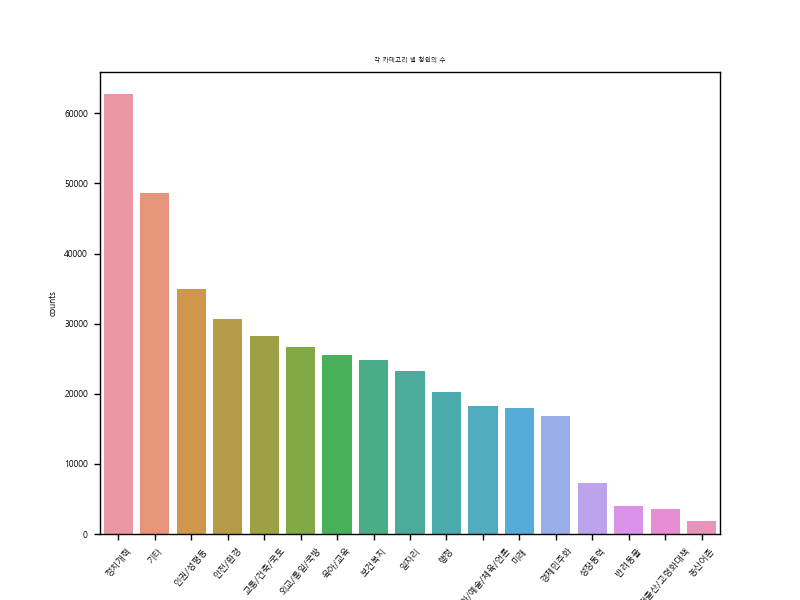

Text(0.5, 1.0, '각 카테고리 별 청원의 수')

In [101]:
#각 카테고리 별 청원의 수 그래프
bar_catg_counts=plt.subplots()
plt.xticks(rotation = 50 )
plt.rcParams["font.size"] = 3
bar_catg_counts=sns.barplot(x='category',y='counts',data=catg_counts)
bar_catg_counts.set_title("각 카테고리 별 청원의 수")

#### 정치개혁 부문의 청원이 가장 많았고, 인권/성평등, 안전/환경, 교통/건축/국토 순으로 많은 청원이 올라왔다.

### 3-2) 답변 대상이 된 청원과 답변된 청원의 부문비교

In [111]:
#답변 대상이 된 청원
answer=df[df['votes']>=200000]
#답변된 청원
answered=df[df['answered']==1]

In [133]:
#답변 대상이 된 (200000표 이상을 받은) 부문별 개수
answer_catg_counts=pd.DataFrame(answer['category'].value_counts()).reset_index()
answer_catg_counts.columns=['category','counts']

# 실제 답변 된 청원의 부문별 개수
answered_catg_counts=pd.DataFrame(answered['category'].value_counts()).reset_index()
answered_catg_counts.columns=['category','counts']

In [162]:
# 답변 대상 청원과 실제 답변된 청원의 부문별 개수 및 답변율
answer_ed_counts = pd.merge(answer_catg_counts,answered_catg_counts, how='left', left_on='category', right_on='category')
answer_ed_counts['rate']=answer_ed_counts['counts_y']/answer_ed_counts['counts_x']
answer_ed_counts.sort_values(by='rate',ascending=False).fillna('0')

,category,counts_x,counts_y,rate
11,성장동력,2,2,1
12,미래,1,1,1
13,행정,1,1,1
7,보건복지,3,2,0.666667
8,교통/건축/국토,3,2,0.666667
4,문화/예술/체육/언론,7,4,0.571429
10,경제민주화,2,1,0.5
0,인권/성평등,24,9,0.375
9,육아/교육,3,1,0.333333
2,정치개혁,8,2,0.25


<IPython.core.display.Javascript object>


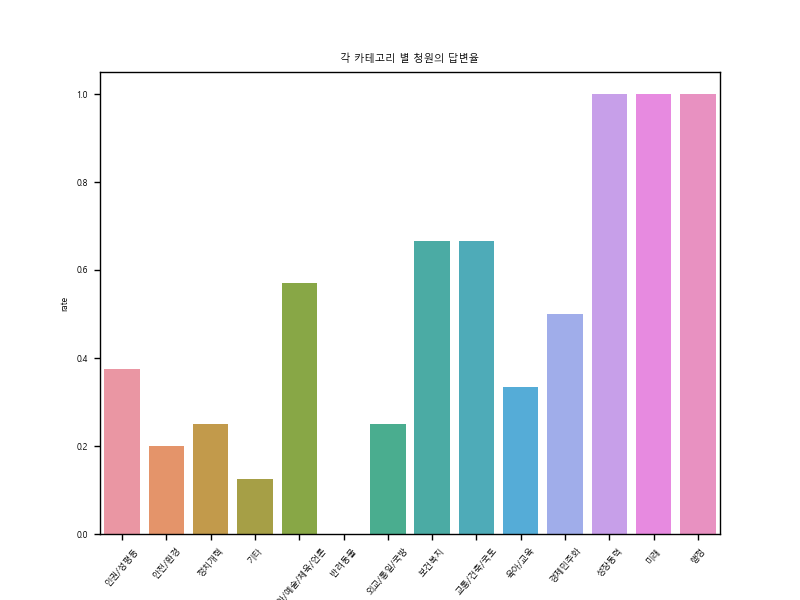

Text(0.5, 1.0, '각 카테고리 별 청원의 답변율')

In [163]:
bar_catg_counts=plt.subplots()
plt.xticks(rotation = 50 )
plt.rcParams["font.size"] = 5
answer_ed_catg_counts=sns.barplot(x='category',y='rate',data=answer_ed_counts)
answer_ed_catg_counts.set_title("각 카테고리 별 청원의 답변율")

#### 성장동력,미래,행정과 관련된 청원은 답변 대상이 된 개수가 각각 2개,1개,1개로 비교적 적음에도 100%의 답변율을 보였다. 반면 반려동물과 관련된 청원은 4개 중 하나도 답변이 되지 않았다. 또한 안전/환경 관련 청원은 답변 대상이 된 개수가 10개로 비교적 많음에도 답변율은 20%에 그쳤다.

### 3-3) 답변 대상이 된 청원과 답변된 청원의 개수비교

In [125]:
#답변 대상 청원과 답변된 청원의 총 개수
total_answer=answer_catg_counts['counts'].sum()
total_answered=answered_catg_counts['counts'].sum()
dic={'catg':['total_answer','total_answered'],'total':[total_answer,total_answered]}
total=pd.DataFrame(dic)
total

,catg,total
0,total_answer,80
1,total_answered,29


<IPython.core.display.Javascript object>


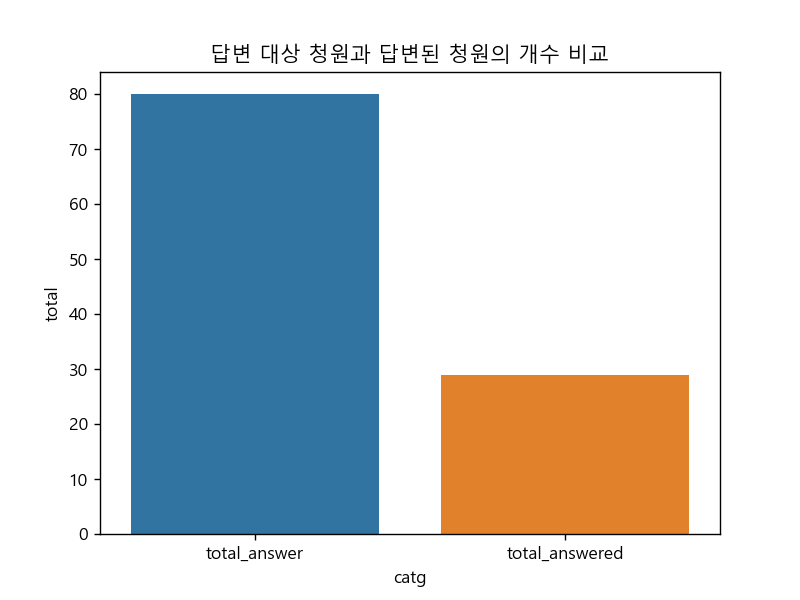

Text(0.5, 1.0, '답변 대상 청원과 답변된 청원의 개수 비교')

In [129]:
bar_total=plt.subplots()
bar_total=sns.barplot(x='catg',y='total',data=total)
bar_total.set_title("답변 대상 청원과 답변된 청원의 개수 비교")

#### 답변 대상이 된 청원 중 절반 이하가 실제로 답변되었음을 알 수 있다.

### 3-4)  청원 시기와 관련된 데이터

In [164]:
from datetime import datetime

In [169]:
#start변수를 통해 년,월,일,요일 추출 후 새 변수에 할당
df['start_year'] = df['start'].dt.year
df['start_month'] = df['start'].dt.month
df['start_day'] = df['start'].dt.day
df['start_hour'] = df['start'].dt.hour
df['start_dow'] = df['start'].dt.dayofweek
df.head(6)

,article_id,start,end,answered,votes,category,title,content,start_month,start_day,start_hour,start_dow,start_year
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...,8,19,0,5,2017
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...,8,19,0,5,2017
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...",8,19,0,5,2017
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...,8,19,0,5,2017
4,25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...",8,19,0,5,2017
5,26,2017-08-19,2017-08-26,0,2,보건복지,보건복지부 부령 제339호중 “특수의료장비 운영에 관한 규칙” 중 불합리한 행정제...,청원인 왕 기 운\n서울 도봉구 창동 삼성아파트 101-1103호\n청원취지\n보...,8,19,0,5,2017


### 3-4-1) 요일에 따른 청원 수 비교

<IPython.core.display.Javascript object>


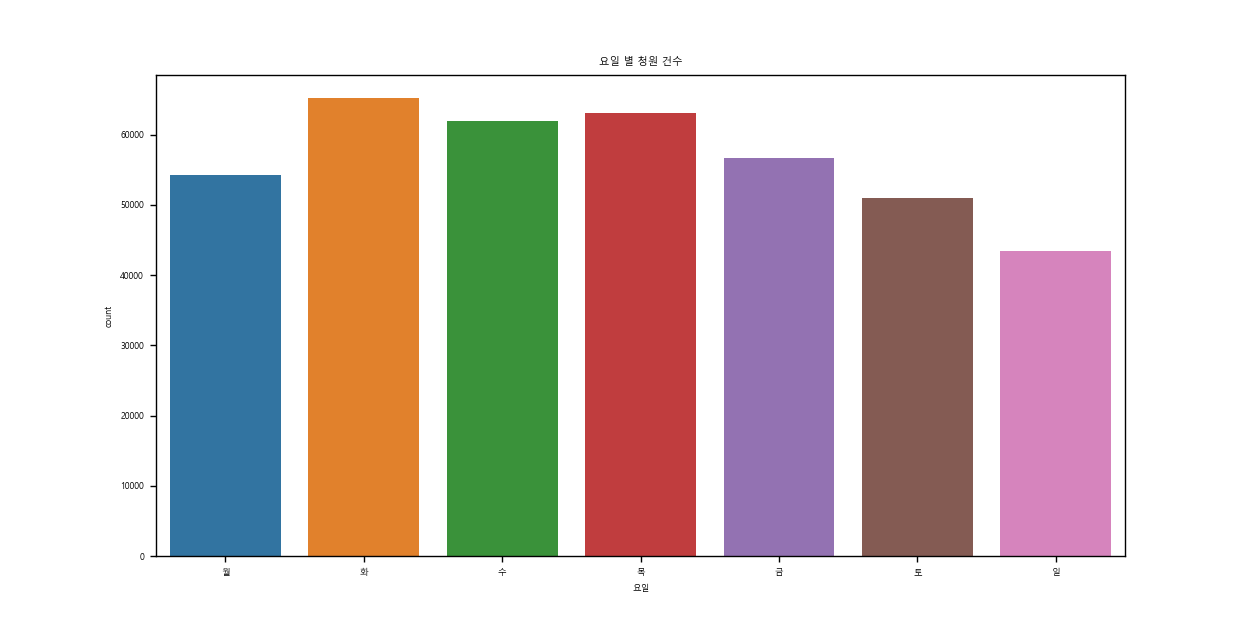

Text(0.5, 0, '요일')

In [174]:
plt.figure(figsize=(10,5))
sns.countplot(data= df, x="start_dow")
plt.xticks([0,1,2,3,4,5,6], ['월', '화', '수','목','금','토','일'])
plt.title("요일 별 청원 건수")
plt.xlabel("요일")

#### 화요일에 가장 많은 청원이 올라왔고, 일요일에 가장 적은 청원이 올라왔다.

### 3-4-2) 달에 따른 청원 수 비교

<IPython.core.display.Javascript object>


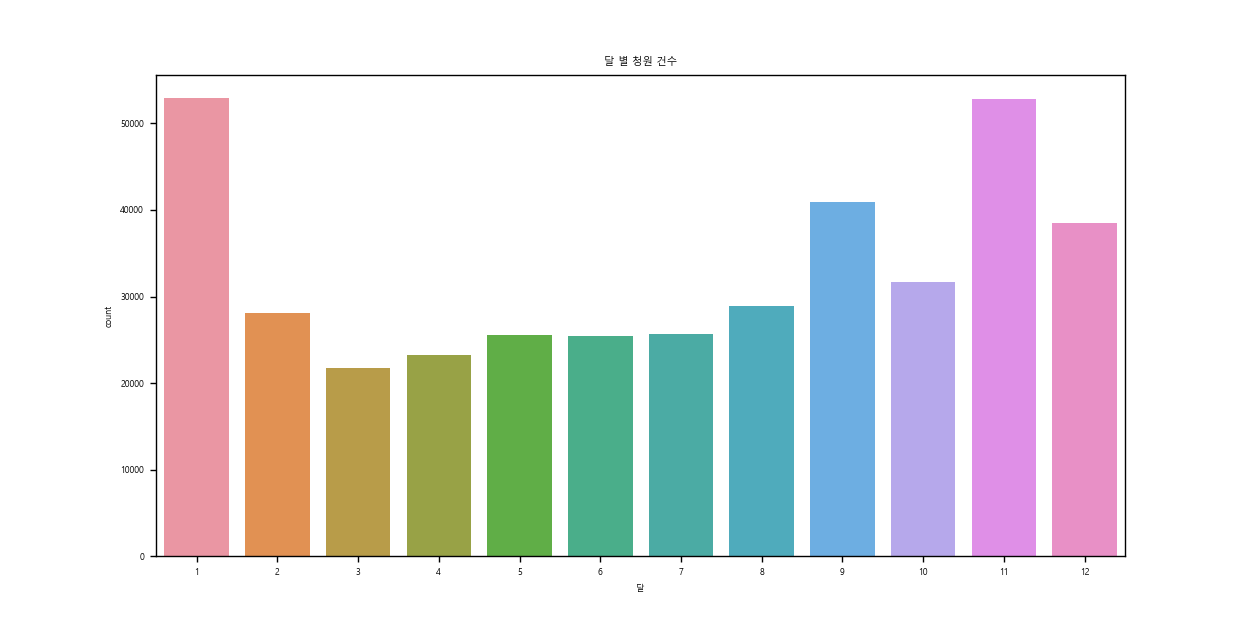

Text(0.5, 0, '달')

In [175]:
plt.figure(figsize=(10,5))
sns.countplot(data= df, x="start_month")
plt.title("달 별 청원 건수")
plt.xlabel("달")

#### 1월과 11월에 가장 많은 청원이 올라왔고, 3월에 가장 적은 청원이 올라왔다.